In [1]:
# -*- coding: utf-8 -*-

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

In [3]:
tweets_data_path = 'twitter_data_new.txt'

In [4]:
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [5]:
tweets_data[50]['extended_tweet']['full_text']

'@ZigicBranko @PetarDettoni Nikogovići ne "isplivaju", nego se u vremenu blagostanja normalni, psihički zdravi ljudi ne obaziru na sitne nepravde (jer "ima za sve"), a nikogovići se tako penju na vlast. Kad se okupe na vlasti krenu u zulum, a ljudi to dožive kao iznenađenje. To je društveni proces.'

In [6]:
tweets_data[10294]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Aug 30 18:29:25 +0000 2018',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 705417488889200640,
    'id_str': '705417488889200640',
    'indices': [3, 15],
    'name': 'profesorka',
    'screen_name': 'Profesorka2'}]},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 1035233043575963649,
 'id_str': '1035233043575963649',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': True,
 'lang': 'und',
 'place': None,
 'quote_count': 0,
 'quoted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Aug 28 08:40:39 +0000 2018',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url': 'https://twitter.com/i/web/status/103436009656

In [7]:
print(len(tweets_data))

70721


In [8]:
tweets=pd.DataFrame({'text' : [], 'lang' : [], 'country' : []})
tweets

,country,lang,text


In [9]:
tweets

,country,lang,text


In [10]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

In [11]:
tweets.head

<bound method NDFrame.head of                                   country                                lang  \
0      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
1      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
2      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
3      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
4      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
5      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
6      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
7      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
8      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
9      <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>   
10     <map object at 0x0000026B43ACA630>  <map object at 0x0000026B43ACA550>  

In [12]:
len(tweets['text'])

70721

In [13]:
for i in range(0,len(tweets['text'])):
    if 'retweeted_status' in tweets_data[i] and 'extended_tweet' in tweets_data[i]['retweeted_status']:
        tweets['text'][i]=tweets_data[i]['retweeted_status']['extended_tweet']['full_text']
    elif 'extended_tweet' in tweets_data[i]:
        tweets['text'][i]=tweets_data[i]['extended_tweet']['full_text']
    else:
        tweets['text'][i]=tweets_data[i]['text']
    tweets['lang'][i]=tweets_data[i]['lang']

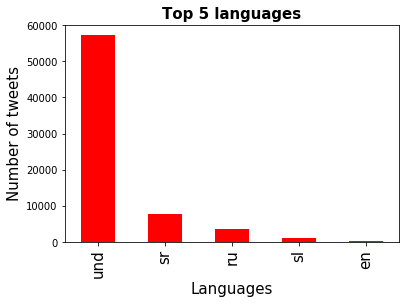

In [14]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [15]:
tweets['text'].to_csv("tweets_70k.csv", encoding = "utf-8")

In [16]:
data = pd.read_csv("tweets_modified_50k.xlsx", header=None)

ParserError: Error tokenizing data. C error: Expected 2 fields in line 31, saw 3


In [312]:
tweet_list = np.array(data[0])

In [313]:
words = list()
for i in range(0,634):
    words = words + tweet_list[i].split(sep = " ")

In [314]:
len(words)

12889

In [315]:
words_df = pd.DataFrame(words, columns=["words"])

In [316]:
words_df

,words
0,Column2
1,@bjokic69
2,@vlaykovic
3,pravnik
4,i
5,advokat
6,nije
7,isto.
8,RT
9,@InformerNovine:


In [295]:
words_df.words.value_counts()

RT                                  289
i                                   204
                                    168
da                                  162
je                                  162
и                                   151
se                                  116
@sns_srbija:                        114
u                                    95
@avucic:                             93
да                                   88
na                                   82
za                                   79
за                                   72
su                                   71
у                                    69
сте                                  66
Ђурић                                59
@markodjuric:                        59
ће                                   57
#Vucic                               54
Александар                           54
Србији                               51
велику                               50
https://t.co/qV22iGEF4U              49
